# Levantamos la data

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [4]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

X.shape

(442, 10)

# Grid search sencillo

In [93]:
import math

experiment_results = []

# Exploramos el espacio de búsqueda con estos 2 for
for max_depth in [3, 5, 10, None]:
    for min_samples_split in [2, 10, 30, 100]:
        # Instanciamos el modelo
        model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        
        # Lo ajustamos
        model.fit(X_train, y_train)
        
        # Registramos el resultado del experimento
        experiment_results.append(
            {
                'max_depth': max_depth, 'min_samples_split': min_samples_split,
                'model_complexity': model.get_n_leaves(), 
                'tr_err': math.sqrt(mean_squared_error(y_train, model.predict(X_train))),
                'te_err': math.sqrt(mean_squared_error(y_test, model.predict(X_test)))
            }
        )

In [94]:
import pandas as pd

# Convertimos los resultados en un dataframe
experiment_results = pd.DataFrame(experiment_results)

experiment_results

,max_depth,min_samples_split,model_complexity,tr_err,te_err
0,3.0,2,8,52.453562,69.259536
1,3.0,10,8,52.453562,69.259536
2,3.0,30,8,52.453562,69.259536
3,3.0,100,5,56.326919,63.078953
4,5.0,2,30,42.487744,75.944493
5,5.0,10,22,43.575495,75.426305
6,5.0,30,19,45.475606,73.277466
7,5.0,100,5,56.326919,63.078953
8,10.0,2,207,11.730348,85.191033
9,10.0,10,64,27.864713,85.828300


## Visualizamos un scatter plot de los modelos que probamos

Cada bolita es un modelo

* Eje x: training error
* Eje y: test error
* Color: model complexity
* A la izquierda estan los modelos que ajustaron perfecto el trainingset, de complejidad alta
* A la derecha los de complejidad mas baja que no ajustaron perfecto al trainingset

Text(0.5, 1.0, 'training vs test error, color = model complexity')

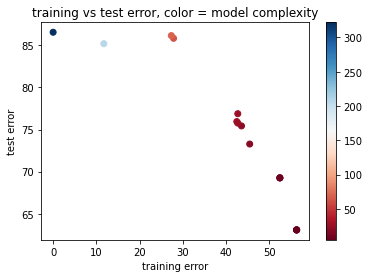

In [95]:
import matplotlib.pyplot as plt

plt.set_cmap('RdBu')
ax = plt.scatter(experiment_results.tr_err, experiment_results.te_err, c=experiment_results.model_complexity)
plt.colorbar(ax)
plt.xlabel('training error')
plt.ylabel('test error')
plt.title('training vs test error, color = model complexity')

# Grid search usando scikit learn

Cuando tenemos mas hyperparametros, ese for anidado se puede tornar incómodo.

En lugar de escribirlo, podemos utilizar ParameterGrid de scikit-learn

In [20]:
from sklearn.model_selection import ParameterGrid

grid = ParameterGrid(
    {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 10, 30, 100]
    }
)
list(grid)

[{'max_depth': 3, 'min_samples_split': 2},
 {'max_depth': 3, 'min_samples_split': 10},
 {'max_depth': 3, 'min_samples_split': 30},
 {'max_depth': 3, 'min_samples_split': 100},
 {'max_depth': 5, 'min_samples_split': 2},
 {'max_depth': 5, 'min_samples_split': 10},
 {'max_depth': 5, 'min_samples_split': 30},
 {'max_depth': 5, 'min_samples_split': 100},
 {'max_depth': 10, 'min_samples_split': 2},
 {'max_depth': 10, 'min_samples_split': 10},
 {'max_depth': 10, 'min_samples_split': 30},
 {'max_depth': 10, 'min_samples_split': 100},
 {'max_depth': None, 'min_samples_split': 2},
 {'max_depth': None, 'min_samples_split': 10},
 {'max_depth': None, 'min_samples_split': 30},
 {'max_depth': None, 'min_samples_split': 100}]

In [96]:
def evaluate_model(params):
    # Notar que esta funcion es escencialmente el cuerpo del for anidado de antes
    model = DecisionTreeRegressor(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'])
    model.fit(X_train, y_train)
    return {
        'max_depth': params['max_depth'], 'min_samples_split': params['min_samples_split'],
        'model_complexity': model.get_n_leaves(), 
        'tr_err': math.sqrt(mean_squared_error(y_train, model.predict(X_train))),
        'te_err': math.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    }

experiment_results = []
for params in grid:
    experiment_results.append(evaluate_model(params))
    

In [98]:
pd.DataFrame(experiment_results)

,max_depth,min_samples_split,model_complexity,tr_err,te_err
0,3.0,2,8,52.453562,69.259536
1,3.0,10,8,52.453562,69.259536
2,3.0,30,8,52.453562,69.259536
3,3.0,100,5,56.326919,63.078953
4,5.0,2,30,42.487744,74.594758
5,5.0,10,22,43.575495,74.313807
6,5.0,30,19,45.475606,72.131834
7,5.0,100,5,56.326919,63.078953
8,10.0,2,207,11.730348,89.983094
9,10.0,10,64,27.864713,85.828300


# Hyperopt

Ahora vamos a ver como podemos utilizar hyperopt

In [101]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def objective(params):
    # Tenemos que hacer una adaptacion a nuestra funcion evaluate_model para que funcione con hyperopt
    if params['min_samples_split'] is not None:
        params['min_samples_split'] = int(params['min_samples_split'])
        
    res = evaluate_model(params)
    
    res['loss'] = res['te_err'] # Esta loss es la que hyperopt intenta minimizar
    res['status'] = STATUS_OK # Asi le decimos a hyperopt que el experimento salio bien
    return res 

# Este espacio es una copia del grid search, no estamos dando mucha información en este prior
hyperparameter_space = {
    'max_depth': hp.choice('max_depth', [3, 5, 10, None]),
    'min_samples_split': hp.choice('min_samples_split', [2, 10, 30, 100]),
}

trials = Trials()
fmin(
    objective,
    space=hyperparameter_space,
    algo=tpe.suggest,
    max_evals=16,
    trials=trials
);

100%|██████████| 16/16 [00:00<00:00, 130.72trial/s, best loss: 63.07895344878453]


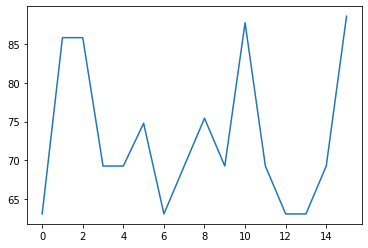

In [102]:
# El espacio de búsqueda es muy pequeño, no vamos a ver una tendencia aqui
plt.plot(trials.losses())

In [103]:
experiment_results = pd.DataFrame(trials.results)
experiment_results

,max_depth,min_samples_split,model_complexity,tr_err,te_err,loss,status
0,3.0,100,5,56.326919,63.078953,63.078953,ok
1,10.0,10,64,27.864713,85.828300,85.828300,ok
2,10.0,10,64,27.864713,85.828300,85.828300,ok
3,3.0,10,8,52.453562,69.259536,69.259536,ok
4,3.0,10,8,52.453562,69.259536,69.259536,ok
5,5.0,2,30,42.487744,74.781153,74.781153,ok
6,5.0,100,5,56.326919,63.078953,63.078953,ok
7,3.0,30,8,52.453562,69.259536,69.259536,ok
8,5.0,10,22,43.575495,75.426305,75.426305,ok
9,3.0,10,8,52.453562,69.259536,69.259536,ok


### Apartado: distribuciones de hyperopt

[Acá](https://github.com/hyperopt/hyperopt/wiki/FMin#21-parameter-expressions) podes ver todas las distribuciones que tenemos en hyperopt

En este ejemplo vamos a utilizar qloguniform que es una uniforme cuantizada, que pone más densidad en los números bajos

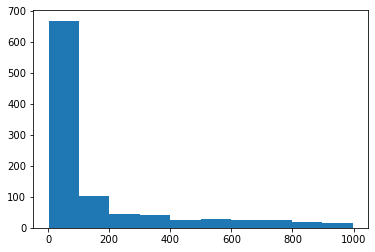

In [112]:
import numpy as np
import hyperopt.pyll.stochastic

variable = hp.qloguniform('test', low=np.log(1), high=np.log(1000), q=1)
samples = [hyperopt.pyll.stochastic.sample(variable) for i in range(1000)]
plt.hist(samples);

In [113]:
# Este espacio es mucho mas rico
hyperparameter_space = {
    'max_depth': hp.qloguniform('max_depth', low=np.log(1), high=np.log(100), q=1),
    'min_samples_split': hp.qloguniform('min_samples_split', low=np.log(2), high=np.log(500), q=1),
}

trials = Trials()
fmin(
    objective,
    space=hyperparameter_space,
    algo=tpe.suggest,
    max_evals=200,
    trials=trials
);

100%|██████████| 200/200 [00:03<00:00, 52.01trial/s, best loss: 62.08104849957013]


Podemos graficar la loss (test error) de cada trial. 

De este grafico se puede ver que encuentra una configuración buena muy rapidamente y luego se queda probando otras cosas hasta cumplir los 200 experimentos

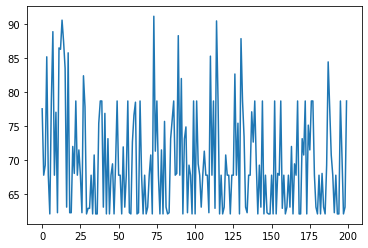

In [117]:
plt.plot(trials.losses())

In [118]:
experiment_results = pd.DataFrame(trials.results)
experiment_results

,max_depth,min_samples_split,model_complexity,tr_err,te_err,loss,status
0,57.0,24,34,39.703689,77.548110,77.548110,ok
1,1.0,20,2,64.640306,67.780774,67.780774,ok
2,3.0,4,8,52.453562,69.259536,69.259536,ok
3,31.0,8,86,22.985497,85.202712,85.202712,ok
4,1.0,181,2,64.640306,67.780774,67.780774,ok
...,...,...,...,...,...,...,...
195,23.0,381,1,76.447799,78.701907,78.701907,ok
196,16.0,80,8,52.057470,70.753650,70.753650,ok
197,19.0,187,3,60.404786,62.081048,62.081048,ok
198,5.0,90,5,56.326919,63.078953,63.078953,ok


Si observamos el model complexity, podemos ver que no exploró muchos modelos complejos. Esto podemos atribuirlo a que los modelos complejos son muy suceptibles a overfitting y generan una loss mas alta

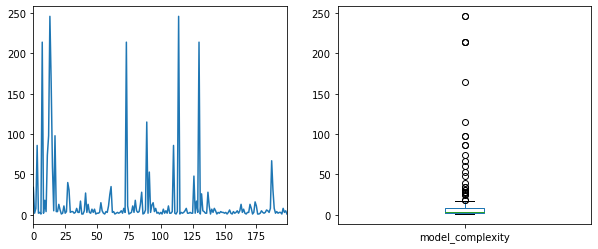

In [119]:
plt.figure(figsize=(10,4))
plt.subplot(121)
experiment_results.model_complexity.plot()
plt.subplot(122)
experiment_results.model_complexity.plot.box()

Text(0, 0.5, 'test error')

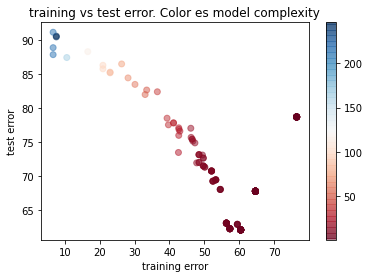

In [120]:
ax = plt.scatter(
    experiment_results.tr_err, experiment_results.te_err, c=experiment_results.model_complexity, alpha=0.5
)
plt.colorbar(ax)
plt.title('training vs test error. Color es model complexity')
plt.xlabel('training error')
plt.ylabel('test error')